In [ ]:
%matplotlib qt

In [2]:
import mne
from eeg.eeg_processing import process
from eeg.eeg_feature_extraction import extract_eeg_features, get_full_features_list

In [ ]:
get_full_features_list()

In [ ]:
df = extract_eeg_features(subject_id="zdfy",
                    subjects_dir="/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/new_style",
                    sensor_space_features=["pow_freq_bands"],
                    source_space_power=True,
                    sensor_space_connectivity=True,
                    source_space_connectivity=False,
                    freq_bands={"alpha": [8, 13], "theta": [4, 8]})


Reading /Users/payamsadeghishabestari/antinomics_clean_codes/subjects/new_style/zdfy/epochs/epochs-rest-eo.fif ...
    Read a total of 5 projection items:
        Average EEG reference (1 x 59) active
        ECG-eeg--0.200-0.400-PCA-01 (1 x 59) active
        ECG-eeg--0.200-0.400-PCA-02 (1 x 59) active
        EOG-eeg--0.200-0.200-PCA-01 (1 x 59) active
        EOG-eeg--0.200-0.200-PCA-02 (1 x 59) active
    Found the data of interest:
        t =       0.00 ...    1996.00 ms
        0 CTF compensation matrices available
Not setting metadata
143 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 5)
5 projection items activated


/Users/payamsadeghishabestari/antinomics_clean_codes/codes/codes/eeg/eeg_feature_extraction.py:38: RuntimeWarning: This filename (/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/new_style/zdfy/epochs/epochs-rest-eo.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs = read_epochs(ep_fname, preload=True)


(143, 118)


NotImplementedError: 

In [3]:
df

,F3_vs_Fp1_alpha,F7_vs_Fp1_alpha,F7_vs_F3_alpha,FT9_vs_Fp1_alpha,FT9_vs_F3_alpha,FT9_vs_F7_alpha,FC5_vs_Fp1_alpha,FC5_vs_F3_alpha,FC5_vs_F7_alpha,FC5_vs_FT9_alpha,...,FCz_vs_CP4_alpha,FCz_vs_TP8_alpha,FCz_vs_C6_alpha,FCz_vs_C2_alpha,FCz_vs_FC4_alpha,FCz_vs_FT8_alpha,FCz_vs_F6_alpha,FCz_vs_AF8_alpha,FCz_vs_AF4_alpha,FCz_vs_F2_alpha
0,0.248882,0.564647,0.486583,0.508382,0.131524,0.799246,0.533975,0.503017,0.880985,0.769746,...,0.178643,0.560428,0.662814,0.609781,0.461600,0.762024,0.601084,0.832185,0.563773,0.408086
1,0.418323,0.286081,0.648522,0.324832,0.450208,0.861168,0.369171,0.788710,0.914353,0.744746,...,0.499360,0.702696,0.882368,0.335171,0.475794,0.837757,0.830951,0.831499,0.254368,0.616880
2,0.335486,0.489843,0.564665,0.405608,0.277667,0.861230,0.499440,0.619652,0.921401,0.789994,...,0.182080,0.582624,0.706629,0.340683,0.256901,0.808882,0.720327,0.756832,0.378062,0.517900
3,0.271182,0.277556,0.710220,0.104666,0.444100,0.760166,0.054573,0.680870,0.899074,0.689548,...,0.618279,0.527081,0.831723,0.148513,0.360438,0.750852,0.593195,0.866082,0.181206,0.412276
4,0.201988,0.557400,0.651660,0.578110,0.406436,0.813668,0.751907,0.649825,0.841426,0.736987,...,0.398323,0.781631,0.800263,0.526221,0.379684,0.863324,0.734563,0.877984,0.201396,0.676117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.138178,0.719564,0.357490,0.758195,0.232481,0.932871,0.634532,0.520586,0.898195,0.830073,...,0.066121,0.334585,0.515948,0.321792,0.036088,0.488149,0.272965,0.712310,0.448990,0.548359
139,0.174569,0.470712,0.414785,0.513299,0.313146,0.947663,0.441299,0.432938,0.936504,0.908302,...,0.174396,0.485690,0.543427,0.117061,0.568830,0.786741,0.766975,0.901710,0.201384,0.581554
140,0.298322,0.198542,0.104006,0.126372,0.447338,0.808465,0.169074,0.187036,0.898075,0.836242,...,0.308692,0.586279,0.802075,0.036409,0.242203,0.494050,0.359186,0.644944,0.381274,0.834478
141,0.728711,0.431013,0.577269,0.348560,0.606456,0.683400,0.410038,0.560838,0.801853,0.240226,...,0.655272,0.921003,0.925981,0.594419,0.517251,0.914533,0.859554,0.969468,0.492680,0.713038


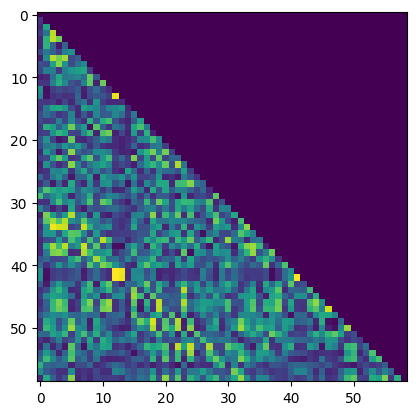

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(con.get_data(output="dense"))

In [14]:
import numpy as np

# Let's assume:
con_matrix = np.squeeze(con.get_data(output="dense"))  # your (59, 59) connectivity matrix
names = [f"name_{i+1}" for i in range(59)]  # list of 59 region names

# Get lower triangle indices (excluding diagonal)
i_lower, j_lower = np.tril_indices_from(con_matrix, k=-1)

# Extract values and labels
con_values = con_matrix[i_lower, j_lower]
con_labels = [f"{names[i]} vs {names[j]}" for i, j in zip(i_lower, j_lower)]


In [18]:
con_labels.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
n_epochs, n_channels, n_times = label_ts.shape
reshaped_data = label_ts.reshape(-1, n_times)
freqs, psd = welch(reshaped_data, 250, axis=-1, nperseg=min(256, n_times))

columns = []
labels_power = []
for key, value in freq_bands.items():
    min_freq, max_freq = list(value)
    band_mask = (freqs >= min_freq) & (freqs <= max_freq)
    band_powers = np.trapz(psd[:, band_mask], freqs[band_mask], axis=-1)
    labels_power.append(band_powers.reshape(n_epochs, n_channels))
    columns += [f"{lb.name}_{key}" for lb in labels]

labels_power = np.concatenate(labels_power, axis=1)

(143, 68, 500)

In [5]:
data = np.array(label_ts)
n_epochs, n_channels, n_times = data.shape
reshaped_data = data.reshape(-1, n_times)

In [6]:
reshaped_data.shape

(9724, 500)

In [7]:
data = np.array(label_ts)
n_epochs, n_channels, n_times = data.shape
reshaped_data = data.reshape(-1, n_times)

# Compute PSDs for all flattened (epoch, channel) pairs
freqs, psd = welch(reshaped_data, 250, axis=-1, nperseg=min(256, n_times))

# Extract the desired frequency band
band_mask = (freqs >= 8) & (freqs <= 13)
band_powers = np.trapz(psd[:, band_mask], freqs[band_mask], axis=-1)
x = band_powers.reshape(n_epochs, n_channels)

/var/folders/20/hsy69tx529ndn3rkv5gzcf0c0000gn/T/ipykernel_2037/3372004811.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  band_powers = np.trapz(psd[:, band_mask], freqs[band_mask], axis=-1)


In [8]:
x.shape

(143, 68)

In [11]:
columns = []
labels = mne.read_labels_from_annot(subject="fsaverage", subjects_dir=None, parc="aparc")[:-1]
columns += [f"{lb.name}_alpha" for lb in labels]
# inv = mne.minimum_norm.read_inverse_operator("/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/new_style/zdfy/inv/rest-inv.fif")
# label_ts = src_power[0].extract_label_time_course(labels=labels, src=inv["src"], mode="mean_flip")

In [18]:
np.array(columns).ravel().shape

(68,)

In [20]:
import pandas as pd
pd.DataFrame(x, columns=np.array(columns))


,bankssts-lh_alpha,bankssts-rh_alpha,caudalanteriorcingulate-lh_alpha,caudalanteriorcingulate-rh_alpha,caudalmiddlefrontal-lh_alpha,caudalmiddlefrontal-rh_alpha,cuneus-lh_alpha,cuneus-rh_alpha,entorhinal-lh_alpha,entorhinal-rh_alpha,...,superiorparietal-lh_alpha,superiorparietal-rh_alpha,superiortemporal-lh_alpha,superiortemporal-rh_alpha,supramarginal-lh_alpha,supramarginal-rh_alpha,temporalpole-lh_alpha,temporalpole-rh_alpha,transversetemporal-lh_alpha,transversetemporal-rh_alpha
0,7.434708,10.893887,11.250086,14.367743,4.603374,5.247523,14.217133,22.501578,5.241033,5.591640,...,9.123979,3.540817,3.433074,8.027827,2.415592,3.625610,5.684756,9.213256,9.733332,2.726833
1,10.434157,8.118400,4.337860,10.493432,7.685657,4.035692,16.703721,20.118083,7.943101,10.867368,...,2.708268,3.686016,19.730991,11.828922,7.903121,4.193782,30.825432,33.327239,9.062625,6.402214
2,2.378739,6.759138,8.055073,9.064658,4.612327,3.933242,3.302578,2.574044,3.981340,4.692130,...,1.598635,2.247840,6.005561,5.057633,1.735282,3.122215,8.431034,9.466958,7.663679,3.335441
3,1.838707,7.051268,5.229607,5.618232,2.000463,2.548523,1.930197,1.629715,1.800561,5.871214,...,2.232143,0.857199,1.844964,3.997648,2.804397,2.196287,3.743425,14.884757,4.216551,7.443383
4,10.665249,8.225167,16.024558,19.626212,4.701963,1.932802,4.509658,8.839962,9.116284,6.917172,...,1.803718,7.566592,10.002728,35.356993,9.483714,12.346934,5.229224,29.530534,50.101169,22.798899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,5.724765,46.140648,29.143329,32.448414,5.535443,3.852351,9.760619,7.642750,5.445718,12.954648,...,6.215280,6.036511,13.326193,8.347412,1.662541,8.734173,31.304504,9.193327,14.152772,34.334097
139,2.030684,19.218777,10.575152,9.299411,3.164739,4.128932,3.244939,8.148759,9.976288,19.980426,...,11.999361,2.727910,3.193725,5.474601,2.848720,5.447068,5.172158,4.331121,12.928417,12.576943
140,10.110371,25.085259,14.504822,14.250702,4.519220,4.496424,25.063457,45.314699,15.349040,5.721667,...,9.757056,9.884784,7.348564,12.627415,6.532264,10.412992,13.301891,26.007772,13.903427,8.041760
141,7.975247,70.807025,38.778086,76.049139,3.496093,13.404646,59.586996,60.796844,38.285070,47.774894,...,13.886732,3.327301,7.087218,49.669567,18.232857,17.130503,13.980825,94.854479,87.751717,107.173165


In [ ]:
band_powers.shape

In [ ]:
raw = mne.io.read_raw_fif("/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/new_style/zdfy/preprocessed/raw_rest.fif", preload=True)
raw.plot()

In [ ]:
mne.events_from_annotations(raw)

In [ ]:
process(subject_id="zdfy",
        subjects_dir="/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/new_style",
        paradigm="rest")

In [4]:
import random
import numpy as np
from pyriemann.clustering import Potato
from pyriemann.estimation import Covariances
import mne
from scipy.signal import welch

In [ ]:
epochs = mne.read_epochs("/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/new_style/zdfy/epochs/epochs-rest-eo.fif", preload=True)

In [ ]:
%matplotlib qt
fname = "/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/zdfy/EEG/rest_v1/zdfy_rest_v1.vhdr"
sub_dir = "/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/new_style"
preprocess(fname=fname, subject_id="zdfy",
            subjects_dir=sub_dir,
            site="Zuerich",
            paradigm="rest")

In [ ]:
from eeg import preprocessing
preprocessing(subject_id="zdfy",
                subjects_dir="/Users/payamsadeghishabestari/antinomics_clean_codes/subjects",
                paradigm="rest",
                site="Zuerich",
                psd_check=True,
                manual_data_scroll=True,
                run_ica=False,
                manual_ica_removal=False,
                ssp_eog=True,
                ssp_ecg=True,
                create_report=True,
                saving_dir=None,
                verbose="ERROR")

In [ ]:
%matplotlib qt
from eeg_processing import run_rs_analysis
run_rs_analysis(
        subject_id="zdfy",
        subjects_dir="/Users/payamsadeghishabestari/antinomics_clean_codes/subjects",
        visit=1,
        event_ids=None,
        source_analysis=True,
        mri=False,
        subjects_fs_dir=None,
        manual_data_scroll=True,
        automatic_epoch_rejection=False,
        create_report=True,
        saving_dir=None,
        verbose="ERROR"
        )

In [ ]:
%matplotlib qt
from eeg_processing import run_erp_analysis
run_erp_analysis(
        subject_id="zdfy",
        subjects_dir="/Users/payamsadeghishabestari/antinomics_clean_codes/subjects",
        paradigm="gpias",
        events=None,
        source_analysis=True,
        mri=False,
        subjects_fs_dir=None,
        manual_data_scroll=True,
        automatic_epoch_rejection=False,
        create_report=True,
        saving_dir=None,
        verbose="ERROR"
        )

Eyetracking

In [ ]:
from mne.io import read_raw_brainvision, read_raw_eyelink
from mne import events_from_annotations
from mne.preprocessing import realign_raw


## load
fname_eeg = "/Users/payamsadeghishabestari/Downloads/alertness_01_H036.vhdr"
fname_et = "/Users/payamsadeghishabestari/Downloads/local_al1H036.asc"

raw_eeg = read_raw_brainvision(fname_eeg, preload=True)
raw_eye = read_raw_eyelink(fname=fname_et, create_annotations=True) 
events_eeg, event_ids_eeg = events_from_annotations(raw_eeg)
events_eye, event_ids_eye = events_from_annotations(raw_eye)

## for now
stim_id_eeg_1, stim_id_eeg_2 = 8, 9
stim_id_eye_1, stim_id_eye_2 = 4, 5

s_raw = events_eeg[(events_eeg[:,2] == stim_id_eeg_1) | (events_eeg[:,2] == stim_id_eeg_2)][:, 0]
s_other = events_eye[(events_eye[:,2] == stim_id_eye_1) | (events_eye[:,2] == stim_id_eye_2)][:, 0]

## realigning
realign_raw(raw=raw_eeg,
            other=raw_eye,
            t_raw=s_raw / raw_eeg.info["sfreq"] - raw_eeg.first_time,
            t_other=s_other / raw_eye.info["sfreq"] - raw_eye.first_time,
            verbose=None)

raw_eye.add_channels([raw_eeg], force_update_info=True)
events, event_dict = events_from_annotations(raw_eye)
del raw_eeg  

In [ ]:
raw_eye.plot()

Lets see what is regularity

In [ ]:
import mne

In [ ]:
fname = "/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/dvob/EEG/regularity/dvob_regularity.vhdr"
raw = mne.io.read_raw_brainvision(fname, preload=True)
raw.resample(250)

In [ ]:
events, events_dict = mne.events_from_annotations(raw)

In [ ]:
import mne
epochs_fnames = ["/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/zdfy/EEG/rest_v1/epochs-eo-epo.fif",
                "/Users/payamsadeghishabestari/antinomics_clean_codes/subjects/zdfy/EEG/rest_v1/epochs-ec-epo.fif"]

epochs, eye_labels = [], []
for ep_fname, title in zip(epochs_fnames, ["open", "close"]):
    eps = mne.read_epochs(ep_fname, preload=True)
    eps.drop_bad()
    epochs.append(eps)
    eye_labels += len(eps) * [title]

In [ ]:
epochs = mne.concatenate_epochs(epochs)

In [ ]:
import numpy as np
import mne_features

In [ ]:
def compute_sensor_band_power(epochs):
    """
    """
    freq_bands = {
                    "delta": (0.5, 4),
                    "theta": (4, 8),
                    "alpha": (8, 13),
                    "beta": (13, 30),
                    "lower_gamma": (30, 45),
                    "upper_gamma": (45, 80)
                    }
    
    psds, freqs = epochs.compute_psd(method="multitaper",
                                    picks="eeg",
                                    fmin=freq_bands["delta"][0],
                                    fmax=freq_bands["upper_gamma"][1],
                                    ).get_data(return_freqs=True)
    psds /= np.sum(psds, axis=-1, keepdims=True)  # normalize the PSDs
    ep_psds = []
    for fmin, fmax in freq_bands.values():
        psds_band = psds[:, :, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        ep_psds.append(psds_band)
    

    return np.array(ep_psds).transpose(1, 2, 0)

In [ ]:
freq_bands = {
                "delta": (0.5, 4),
                "theta": (4, 8),
                "alpha": (8, 13),
                "beta": (13, 30),
                "lower_gamma": (30, 45),
                "upper_gamma": (45, 80)
                }



epochs.pick("eeg")
funcs_params = {
                    "pow_freq_bands__freq_bands": freq_bands,
                    "pow_freq_bands__psd_method": "multitaper",
                    "pow_freq_bands__normalize": True
                    } 

powers = mne_features.feature_extraction.extract_features(epochs.get_data(),
                                                epochs.info["sfreq"],
                                                selected_funcs=["pow_freq_bands"],
                                                funcs_params=funcs_params,
                                                ch_names=epochs.info["ch_names"]
                                                )

In [ ]:
n_chs = len(epochs.info["ch_names"])
n_freq_bands = len(freq_bands.keys())
powers_reshaped = powers.reshape(len(epochs), n_chs, n_freq_bands)

In [ ]:
columns = [f"ch_{j}_freq_{k}" for j in epochs.info["ch_names"] for k in freq_bands]

In [ ]:
df = pd.DataFrame(powers_reshaped, columns=columns)

In [ ]:
hurst = mne_features.feature_extraction.extract_features(epochs.get_data(),
                                                epochs.info["sfreq"],
                                                selected_funcs=["spect_slope"],
                                                funcs_params=None,
                                                ch_names=epochs.info["ch_names"]
                                                )

In [ ]:
y = hurst.reshape(len(epochs), n_chs, 4)[:,:,:2] # intercept and slope

In [ ]:
y.shape

In [ ]:
x = hurst.reshape(len(epochs), n_chs, 4)[:,:,:2]

In [ ]:
x = x.reshape(257, 118)

In [ ]:
x == hurst[:, :118]

In [ ]:
freq_bands = {
            "delta": (0.5, 4),
            "theta": (4, 8),
            "alpha": (8, 13),
            "beta": (13, 30),
            "lower_gamma": (30, 45),
            "upper_gamma": (45, 80)
            }

psds, freqs = epochs.compute_psd(method="multitaper",
                                    picks="eeg",
                                    fmin=freq_bands["delta"][0],
                                    fmax=freq_bands["upper_gamma"][1],
                                    ).get_data(return_freqs=True)

In [ ]:
psds.shape

In [ ]:
X